#Numerical Methods

$x(t)= v_0\cos(Θ)t$

$y(t)= v_0\sin(Θ)t-\dfrac{1}{2}gt^2$

$t = \dfrac{x(t)}{v_0\cosΘ}$

By pluging $t$ into the $y(t)$ equation we arrive at,

$y(x(t)) = \tan(Θ)x(t)- \dfrac{g}{2v_0\cos^2Θ}x^2(t)$


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import math

In [ ]:
def ConvertAngleToRadians(angle):
  return angle * np.pi / 180

Final Targets:  [37.699999999999996, 81.53636363636363]


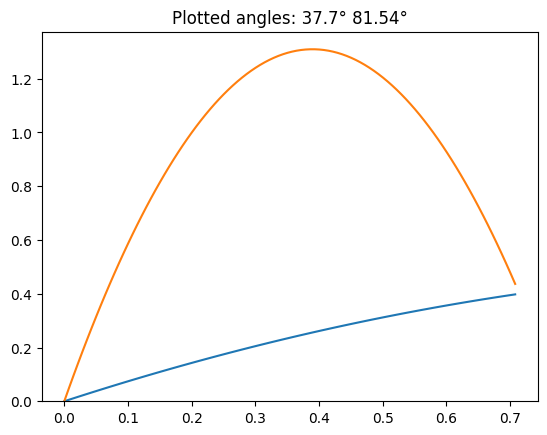

In [ ]:
# Settings
PLOT_STEPS = 100
NUMBER_OF_POINTS = 100
TOLERATED_RANGE = 0.1

# Initial Velocity For Different Launch Settings
INITAL_VELOCITIES = [2.8906265692679463, 3.8110361672687665, 5.121801236500339]
velocity_inital = INITAL_VELOCITIES[2]

# meters
GRAVITY = 9.8
distance = 0.715
height = .40

def NumericalMethod(theta, d):
  angle = ConvertAngleToRadians(theta)

  return np.tan(angle) * d - (GRAVITY * math.pow(d, 2.0)) / (2.0 * math.pow(velocity_inital, 2) * math.pow(np.cos(angle), 2.0))

def createProjectilePlot(angle):
  step_distance = distance / PLOT_STEPS

  x=[]
  y=[]

  for i in range(0, PLOT_STEPS):
    x.append(step_distance * i)
    y.append(NumericalMethod(angle, step_distance * i))

  return [x, y]

def EstimateValue(value):
  previous_launch_test = NumericalMethod(0, distance)

  # Arrays of start and end points in which targets are between
  possible_ranges = [[0, 90]]
  approved_ranges = []

  while(len(possible_ranges) > 0):
    current_range = possible_ranges.pop(0)

    stepSize = (current_range[1] - current_range[0]) / NUMBER_OF_POINTS

    for angle in np.linspace(current_range[0], current_range[1], NUMBER_OF_POINTS):
      current = NumericalMethod(angle, distance)

      launchIsGreaterThanMinValue = max(previous_launch_test, current) >= value
      launchIsLessThanMaxValue = min(previous_launch_test, current) <= value

      if(launchIsGreaterThanMinValue and launchIsLessThanMaxValue):
        if(stepSize < TOLERATED_RANGE):
          approved_ranges.append(angle)
        else:
          possible_ranges.append([angle - stepSize, angle])

      previous_launch_test = current

  print("Final Targets: ", approved_ranges)

  plt.title("Plotted angles: " + '° '.join([str(round(angle, 2)) for angle in approved_ranges]) + '°')

  max_projectile_height = 0

  for angle in approved_ranges:
    [x, y_list] = createProjectilePlot(angle)
    max_projectile_height = max(max_projectile_height, max(y_list))
    plt.plot(x, y_list)  # Plot the chart

  ax = plt.gca()
  ax.set_ylim([0, max_projectile_height * 1.05])
  plt.show()


EstimateValue(height)